In [13]:
import pandas as pd

In [15]:
df = pd.read_csv('car_price_prediction.csv')

In [17]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [19]:
df.shape

(19237, 18)

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import mean_squared_error , mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [23]:
print(df.isnull().sum())

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64


In [25]:
df= df.drop(columns=['ID'])

In [27]:
le = LabelEncoder()
df['Manufacturer'] = le.fit_transform(df['Manufacturer'])
df['Model'] = le.fit_transform(df['Model'])
df['Category'] = le.fit_transform(df['Category'])
df['Leather interior'] = df['Leather interior'].map({'Yes': 1, 'No': 0})
df['Fuel type'] = le.fit_transform(df['Fuel type'])
df['Gear box type'] = le.fit_transform(df['Gear box type'])
df['Drive wheels'] = le.fit_transform(df['Drive wheels'])
df['Doors'] = df['Doors'].replace({'04-May': 4, '02-Mar': 2, '>5': 5})

C:\Users\Asus\AppData\Local\Temp\ipykernel_32884\2019987462.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Doors'] = df['Doors'].replace({'04-May': 4, '02-Mar': 2, '>5': 5})


In [29]:
df.dtypes

Price                 int64
Levy                 object
Manufacturer          int32
Model                 int32
Prod. year            int64
Category              int32
Leather interior      int64
Fuel type             int32
Engine volume        object
Mileage              object
Cylinders           float64
Gear box type         int32
Drive wheels          int32
Doors                 int64
Wheel                object
Color                object
Airbags               int64
dtype: object

In [31]:
# Convert 'Levy' column: Replace '-' with NaN, then convert to float
df['Levy'] = df['Levy'].replace('-', np.nan).astype(float)

# Convert 'Mileage' to numeric: Remove 'km' and commas, then convert to int
df['Mileage'] = df['Mileage'].str.replace(' km', '').str.replace(',', '').astype(float)

# Convert 'Engine volume' to numeric: Remove the 'Turbo' string, convert to float
df['Engine volume'] = df['Engine volume'].str.replace(' Turbo', '').astype(float)

# Handle missing values (optional strategy: fill Levy with median)
df['Levy'] = df['Levy'].fillna(df['Levy'].median())

# Convert 'Wheel' and 'Color' columns to categorical using LabelEncoder
df['Wheel'] = le.fit_transform(df['Wheel'])
df['Color'] = le.fit_transform(df['Color'])

# Check the updated data types
print(df.dtypes)


Price                 int64
Levy                float64
Manufacturer          int32
Model                 int32
Prod. year            int64
Category              int32
Leather interior      int64
Fuel type             int32
Engine volume       float64
Mileage             float64
Cylinders           float64
Gear box type         int32
Drive wheels          int32
Doors                 int64
Wheel                 int32
Color                 int32
Airbags               int64
dtype: object


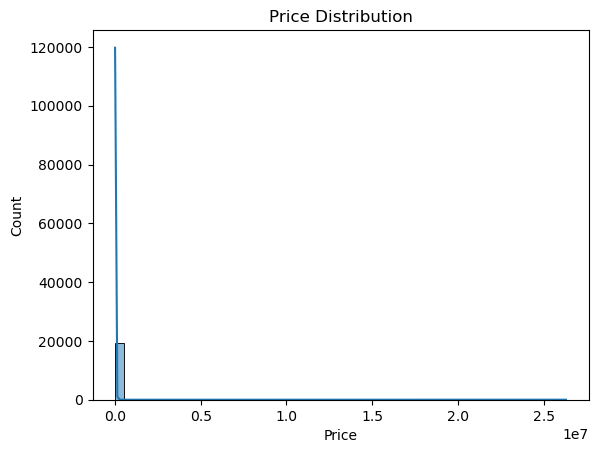

In [33]:
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.show()

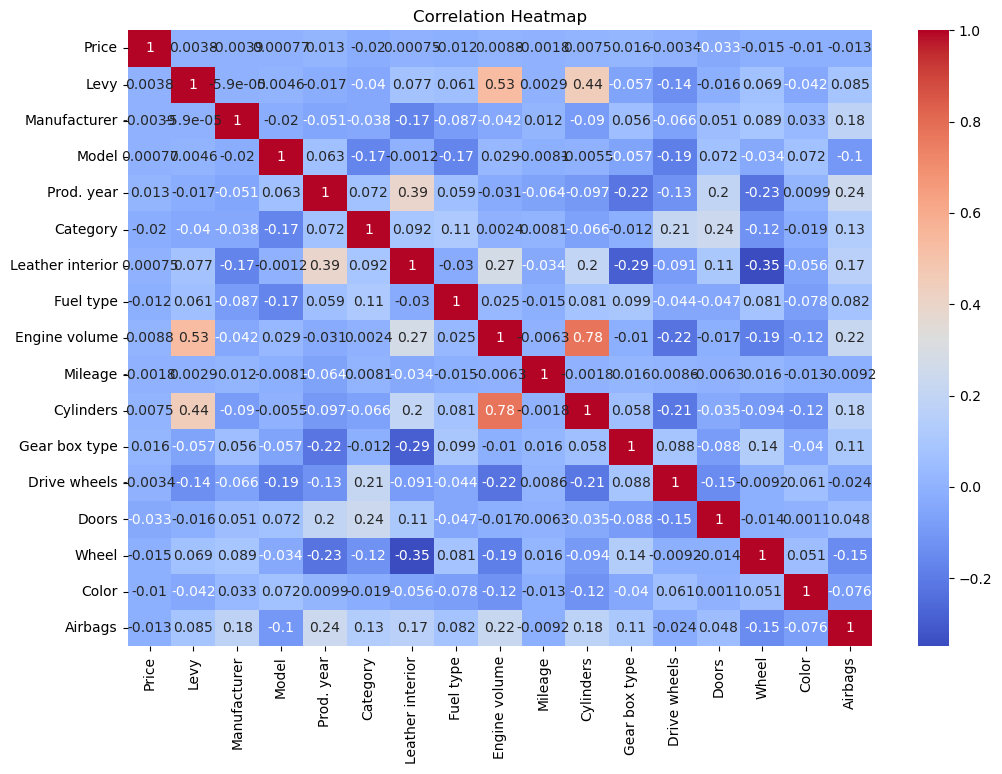

In [35]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


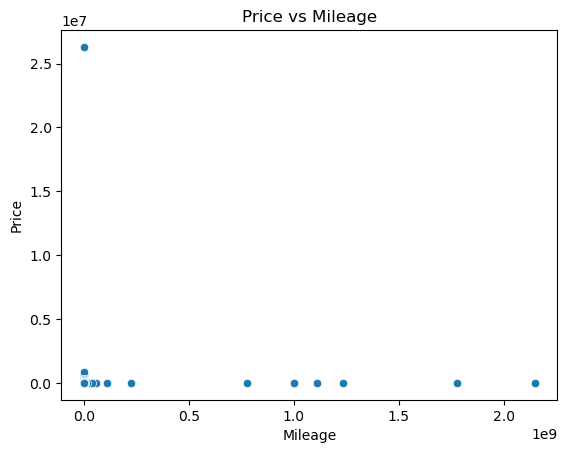

In [37]:
sns.scatterplot(x='Mileage', y='Price', data=df)
plt.title('Price vs Mileage')
plt.show()


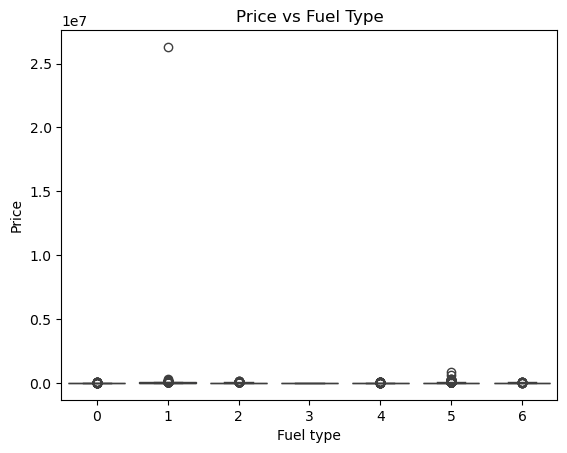

In [39]:
sns.boxplot(x='Fuel type', y='Price', data=df)
plt.title('Price vs Fuel Type')
plt.show()

In [41]:
print(df.columns)


Index(['Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')


In [43]:

X = df.drop(columns=['Price'])  # All columns except 'Price' are features
y = df['Price']  # 'Price' is the target variable


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [49]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

In [51]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)

In [53]:
 # Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)


In [55]:
# 4. Support Vector Machine
svr = SVR()
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)

In [57]:

def evaluate_model(y_true, y_pred, model_name):
    print(f"--- {model_name} ---")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_true, y_pred)}")
    print(f"Mean Squared Error (MSE): {mean_squared_error(y_true, y_pred)}")
    print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_true, y_pred))}")
    print(f"R2 Score: {r2_score(y_true, y_pred)}")
    print("\n")


evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_svr, "Support Vector Machine")


--- Linear Regression ---
Mean Absolute Error (MAE): 12839.943300144605
Mean Squared Error (MSE): 356635766.44267267
Root Mean Squared Error (RMSE): 18884.80252591148
R2 Score: -0.1445431357026894


--- Decision Tree ---
Mean Absolute Error (MAE): 12398.733727052406
Mean Squared Error (MSE): 180021832965.83228
Root Mean Squared Error (RMSE): 424289.79832872754
R2 Score: -576.7400154024646


--- Random Forest ---
Mean Absolute Error (MAE): 7878.568864759972
Mean Squared Error (MSE): 12981974611.858732
Root Mean Squared Error (RMSE): 113938.46853393603
R2 Score: -40.66275883677503


--- Support Vector Machine ---
Mean Absolute Error (MAE): 11325.269839219194
Mean Squared Error (MSE): 324508032.3478287
Root Mean Squared Error (RMSE): 18014.10648208311
R2 Score: -0.041436322017905036




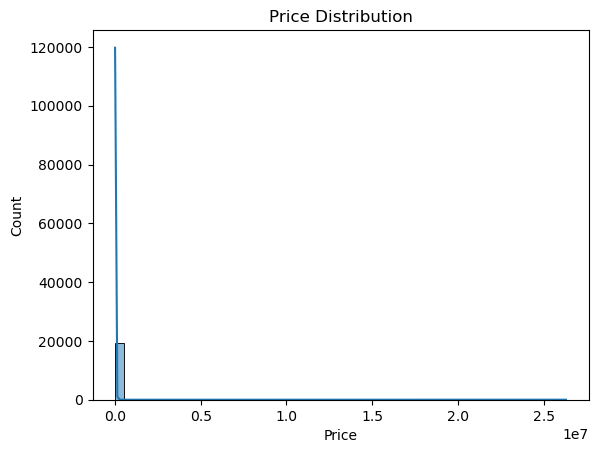

In [59]:
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.show()


In [61]:
df['Price'] = np.log1p(df['Price'])  # Using log1p to handle zero values


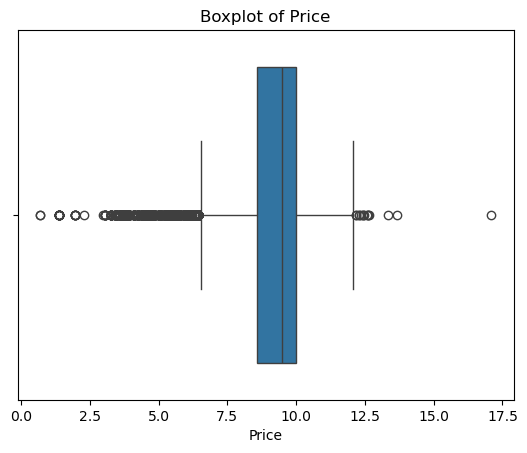

In [63]:
sns.boxplot(x=df['Price'])
plt.title('Boxplot of Price')
plt.show()


In [65]:
# Remove outliers beyond 99th percentile
upper_limit = df['Price'].quantile(0.99)
df = df[df['Price'] <= upper_limit]


In [67]:
print(df.columns)


Index(['Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')


In [69]:
if 'Model' in df.columns:
    print("Column 'Model' exists")
else:
    print("Column 'Model' does not exist")


Column 'Model' exists


In [71]:
target_mean = df.groupby('Model_freq_enc')['Price'].mean()
df['Model_target_enc'] = df['Model_freq_enc'].map(target_mean)


KeyError: 'Model_freq_enc'

In [73]:
target_mean = df.groupby('Model_freq_enc')['Price'].mean()
df['Model_target_enc'] = df['Model_freq_enc'].map(target_mean)


KeyError: 'Model_freq_enc'

In [75]:
df = pd.get_dummies(df, columns=['Fuel type', 'Gear box type', 'Drive wheels', 'Color'], drop_first=True)


In [77]:
numeric_features = ['Levy', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags']
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])


In [79]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df[numeric_features] = imputer.fit_transform(df[numeric_features])


In [81]:
corr = df.corr()
target_corr = corr['Price'].abs().sort_values(ascending=False)
print(target_corr)


Price               1.000000
Gear box type_2     0.208516
Fuel type_2         0.193979
Fuel type_1         0.181522
Prod. year          0.126502
Airbags             0.110756
Wheel               0.079415
Drive wheels_1      0.072551
Manufacturer        0.071551
Cylinders           0.065886
Levy                0.062466
Model               0.051476
Engine volume       0.044432
Fuel type_4         0.044361
Fuel type_6         0.040961
Color_6             0.035452
Gear box type_3     0.034296
Leather interior    0.032684
Color_15            0.030221
Color_11            0.022069
Color_12            0.021521
Color_1             0.020114
Mileage             0.018754
Color_5             0.018143
Color_8             0.017121
Color_4             0.015870
Fuel type_5         0.015058
Category            0.014381
Doors               0.013915
Color_2             0.013887
Color_7             0.012576
Color_10            0.012079
Color_13            0.009221
Drive wheels_2      0.007109
Color_9       

In [83]:
from sklearn.feature_selection import RFE

model = RandomForestRegressor(random_state=42)
selector = RFE(model, n_features_to_select=10)
selector.fit(X_train, y_train)
selected_features = X_train.columns[selector.support_]
X_train = X_train[selected_features]
X_test = X_test[selected_features]


In [85]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
evaluate_model(y_test, y_pred_xgb, "XGBoost")


--- XGBoost ---
Mean Absolute Error (MAE): 5173.011300676826
Mean Squared Error (MSE): 98050044.87743345
Root Mean Squared Error (RMSE): 9902.022262014636
R2 Score: 0.6853301985406832




In [87]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Define parameter grid
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize the model
xgb = XGBRegressor(random_state=42)

# Grid search
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='r2', cv=3, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters: ", grid_search.best_params_)

# Evaluate the model with best parameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Parameters:  {'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.6}


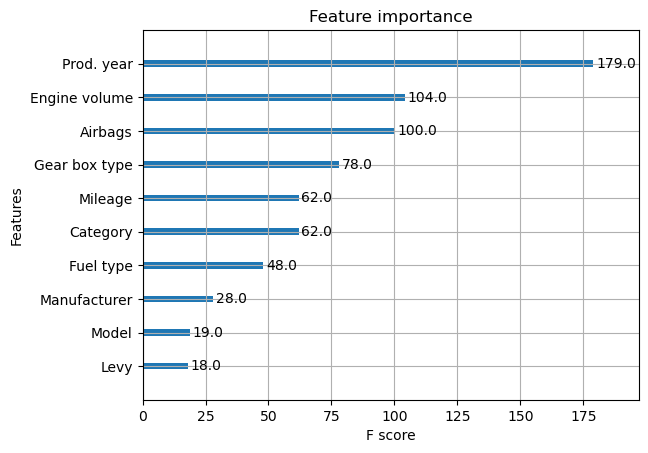

In [89]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Plot feature importance
plot_importance(best_model)
plt.show()


In [91]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print("Cross-Validation MAE: ", -scores.mean())


Cross-Validation MAE:  13614.752195506077


In [93]:
import mlflow
mlflow.xgboost.autolog()

with mlflow.start_run():
    model = XGBRegressor(**grid_search.best_params_)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Log metrics
    mlflow.log_metric("MAE", mean_absolute_error(y_test, y_pred))
    mlflow.log_metric("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))
    mlflow.log_metric("R2", r2_score(y_test, y_pred))


ModuleNotFoundError: No module named 'mlflow'

In [95]:
!pip install mlflow


   ---------------------------------------- 0.0/26.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/26.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/26.7 MB 653.6 kB/s eta 0:00:41
   ---------------------------------------- 0.0/26.7 MB 653.6 kB/s eta 0:00:41
   ---------------------------------------- 0.1/26.7 MB 525.1 kB/s eta 0:00:51
   ---------------------------------------- 0.1/26.7 MB 656.4 kB/s eta 0:00:41
   ---------------------------------------- 0.1/26.7 MB 656.4 kB/s eta 0:00:41
   ---------------------------------------- 0.1/26.7 MB 656.4 kB/s eta 0:00:41
   ---------------------------------------- 0.1/26.7 MB 656.4 kB/s eta 0:00:41
   ---------------------------------------- 0.1/26.7 MB 656.4 kB/s eta 0:00:41
   ---------------------------------------- 0.1/26.7 MB 656.4 kB/s eta 0:00:41
   ---------------------------------------- 0.1/26.7 MB 656.4 kB/s eta 0:00:41
   ---------------------------------------- 0.1/26.7 MB 212.1 kB/s eta

In [97]:
import mlflow
mlflow.xgboost.autolog()

with mlflow.start_run():
    model = XGBRegressor(**grid_search.best_params_)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Log metrics
    mlflow.log_metric("MAE", mean_absolute_error(y_test, y_pred))
    mlflow.log_metric("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))
    mlflow.log_metric("R2", r2_score(y_test, y_pred))


2024/09/17 21:21:12 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\Asus\anaconda2\Lib\site-packages\mlflow\types\utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2024/09/17 21:21:12 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\Asus\anaconda2\Lib\site-packages\xgboost\core.p

In [101]:
from xgboost import XGBRegressor

best_params = {'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.6}
final_model = XGBRegressor(**best_params)
final_model.fit(X_train, y_train)



2024/09/17 21:21:54 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '89f74c764e164f0ead21892cc96a2940', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current xgboost workflow
2024/09/17 21:21:55 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\Asus\anaconda2\Lib\site-packages\mlflow\types\utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [103]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = final_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R2 Score:", r2)


2024/09/17 21:22:09 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\Asus\anaconda2\Lib\site-packages\mlflow\types\utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


Mean Absolute Error (MAE): 12010.190093930694
Mean Squared Error (MSE): 535974508.396379
Root Mean Squared Error (RMSE): 23151.12326424744
R2 Score: -0.7200909224995167
